# Breaking a CAPTCHA system

Ref: https://medium.com/@ageitgey/how-to-break-a-captcha-system-in-15-minutes-with-machine-learning-dbebb035a710

In [1]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

Install some packages below (if not installed already):

In [1]:
!pip install opencv-python
!pip install imutils
!pip install pydot 
!pip install graphviz 
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
!brew install graphviz # only for mac, for other OS, please search the relevant command to install
!brew install wget # only for mac; Linux should work fine, Windows has no wget

zsh:1: command not found: brew
zsh:1: command not found: brew


In this exercise you will break `Really Simple CAPTCHA` plugin of WordPress: https://wordpress.org/plugins/really-simple-captcha/

Try a demo here: https://contactform7.com/captcha/

The plugin generates 4-letter CAPTCHAs using a random mix of four different fonts. Letters are from 'ABCDEFGHJKLMNPQRSTUVWXYZ23456789' and "O", "I" and "1" are not used to avoid user confusion. That leaves us with a total of 32 possible letters and numbers that we need to recognize.

Since we have the source code to the WordPress plug-in, we can modify it to save out CAPTCHA images along with the expected answer for each image. We generated 9955 images under folder `generated_captcha_images`. Run the following code to show 10 images to take a look.

In [2]:
CAPTCHA_IMAGE_FOLDER = "generated_captcha_images"

## Step 1: Extract single letters from CAPTCHA images

### Run the following code to show 10 images to take a look.

In [3]:
import os.path
import glob # glob.glob returns the list of files with their full path, and it supports wildcards

from IPython.display import Image

captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))

for (i, captcha_image_file) in enumerate(captcha_image_files):
    if i==10: break
    print(captcha_image_file)
    display(Image(filename=captcha_image_file))

generated_captcha_images/4FS8.png


generated_captcha_images/NFZ9.png


generated_captcha_images/ZJ7Z.png


generated_captcha_images/PMZA.png


generated_captcha_images/V5Z3.png


generated_captcha_images/5D3R.png


generated_captcha_images/BGQR.png


generated_captcha_images/8SR8.png


generated_captcha_images/BXJG.png


generated_captcha_images/UXVV.png


### Now we illustrate how to process an image `generated_captcha_images/222X.png`

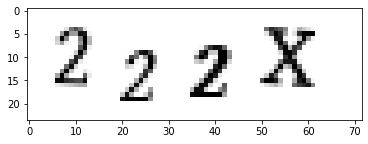

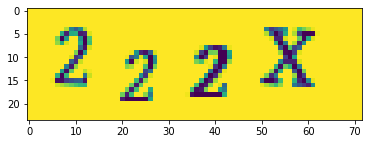

In [4]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt
import cv2 # OpenCV, a popular framework for computer vision and image processing

captcha_image_file = 'generated_captcha_images/222X.png' # normal
# captcha_image_file = 'generated_captcha_images/2W4M.png' # try this: 3 objects, 2 letters are merged
# captcha_image_file = 'generated_captcha_images/3PH3.png' # try this: 5 objects detected
# captcha_image_file = 'generated_captcha_images/JYU4.png' # try this: 6 objects detected

captcha_correct_text = os.path.splitext(captcha_image_file)[0]

# Load the image and convert it to grayscale
image = cv2.imread(captcha_image_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Show the image with matplotlib
plt.imshow(image)
plt.show()

plt.imshow(gray)
plt.show()

In [5]:
captcha_correct_text

'generated_captcha_images/222X'

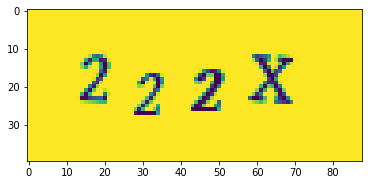

In [6]:
# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

plt.imshow(gray)
plt.show()

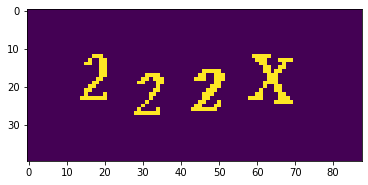

In [7]:
# threshold the image (convert it to pure black and white)
# we use Otsu’s binarization
# check: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

plt.imshow(thresh)
plt.show()

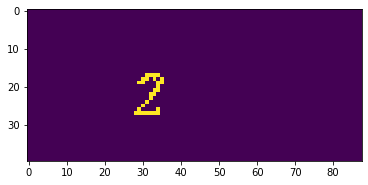

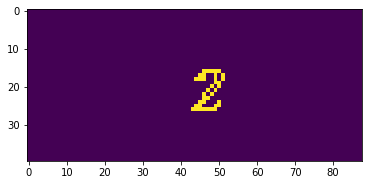

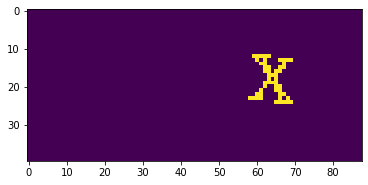

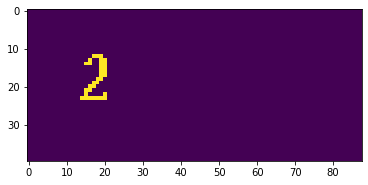

In [9]:
import numpy as np

# find the contours (continuous blobs of pixels) the image
# check:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html#contours-getting-started
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
# !!! if the cell reports error, replace [0] above with [1]

zero_img = np.zeros_like(thresh)

for i in range(len(contours)):
    temp = cv2.drawContours(zero_img.copy(), contours, i, (255,0,0), 1)
    plt.imshow(temp)
    plt.show()

28


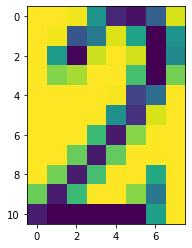

43


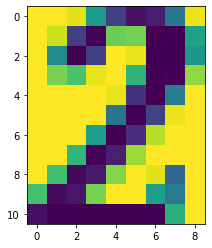

58


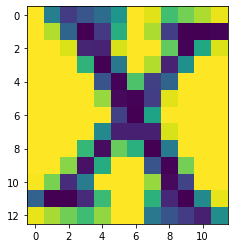

14


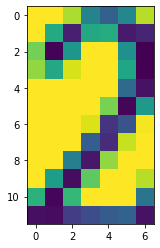

In [10]:
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    print(x)
    letter_image = gray[y:y+h, x:x+w]
    plt.imshow(letter_image)
    plt.show()

### Putting things together: get letters from images

Using what we have learnt above, write your code to save get the letters of all images. The letter-images are stored as 32 folders under folder `extracted_letter_images`.

For example, `extracted_letter_images/A` is a folder that saves all images of letter `A`. After you complete, each letter-folder should contain over 1000 letter-images.

Hint: (1) consider how to name different files in a letter-folder differently? (2) ingore those images with number of contours other than 4.

In [ ]:
os.system(f"mkdir -p extracted_letter_images")

In [11]:
import os
from tqdm import tqdm

LETTER_IMAGES_FOLDER = "extracted_letter_images" # the output for training
SKIPPED_FOLDER = "skipped_images" # those images are skipped
count = {} # counts['A'] = number of 'A'-images, so that next 'A'-image can be named as counts['A'] + 1


# loop over the image paths
for (i, captcha_image_file) in tqdm(enumerate(captcha_image_files)):
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)))

    #############################################################################
    # TODO: your code here ...                                                  #
    #############################################################################
    print(captcha_image_file)
    ## Getting threshold 
    captcha_image_file = captcha_image_file # normal

    captcha_correct_text = os.path.splitext(captcha_image_file)[0]

    # Load the image and convert it to grayscale
    image = cv2.imread(captcha_image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    # !!! if the cell reports error, replace [0] above with [1]

    zero_img = np.zeros_like(thresh)
    
    
    if(len(contours) != 4):
        print('Contour Length does not equal 4')
        continue;
    xPos = []
    ##store the x as ls
    for kk,contour in enumerate(contours):
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)
        xPos.append(x)
    
    order = [x for _, x in sorted(zip(xPos, list(range(4)) ))    ]
  
    
    letterString = list(captcha_image_file.split("/")[1].split(".")[0])
    # print(letterString)
    if(len(letterString) != 4):
        print('String Length does not equal 4')
        continue;
    
    zero_img = np.zeros_like(thresh)

    # for k in range(len(contours)):
    #     temp = cv2.drawContours(zero_img.copy(), contours, k, (255,0,0), 1)
    #     plt.imshow(temp)
    #     plt.show()
    
    ##Get to the images 
    for num,letter in zip(order,letterString):
        # print("Num : " , num) 
        (x, y, w, h) = cv2.boundingRect(contours[num])
        # print("Letter : " , letter)
        letter_image = gray[y:y+h, x:x+w]
        # plt.imshow(letter_image)
        # plt.show()
        if letter not in count:
            count[letter] = 1
            if letter not in os.listdir(LETTER_IMAGES_FOLDER):
                os.mkdir(f"{LETTER_IMAGES_FOLDER}/{letter}")
        else:
            count[letter] += 1
        padded = str(count[letter]).zfill(6)
        cv2.imwrite(f"{LETTER_IMAGES_FOLDER}/{letter}/{padded}.png", letter_image)
 
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

241it [00:00, 2407.64it/s]

[INFO] processing image 1/9955
generated_captcha_images/4FS8.png
[INFO] processing image 2/9955
generated_captcha_images/NFZ9.png
[INFO] processing image 3/9955
generated_captcha_images/ZJ7Z.png
[INFO] processing image 4/9955
generated_captcha_images/PMZA.png
[INFO] processing image 5/9955
generated_captcha_images/V5Z3.png
[INFO] processing image 6/9955
generated_captcha_images/5D3R.png
[INFO] processing image 7/9955
generated_captcha_images/BGQR.png
[INFO] processing image 8/9955
generated_captcha_images/8SR8.png
[INFO] processing image 9/9955
generated_captcha_images/BXJG.png
[INFO] processing image 10/9955
generated_captcha_images/UXVV.png
[INFO] processing image 11/9955
generated_captcha_images/V95E.png
[INFO] processing image 12/9955
generated_captcha_images/3TQM.png
[INFO] processing image 13/9955
generated_captcha_images/836M.png
[INFO] processing image 14/9955
generated_captcha_images/T3TN.png
[INFO] processing image 15/9955
generated_captcha_images/BJKK.png
[INFO] processing i

1233it [00:00, 3214.59it/s]

[INFO] processing image 564/9955
generated_captcha_images/S7FK.png
[INFO] processing image 565/9955
generated_captcha_images/X8PM.png
[INFO] processing image 566/9955
generated_captcha_images/JG2C.png
Contour Length does not equal 4
[INFO] processing image 567/9955
generated_captcha_images/T2UU.png
[INFO] processing image 568/9955
generated_captcha_images/6BYZ.png
[INFO] processing image 569/9955
generated_captcha_images/55E9.png
[INFO] processing image 570/9955
generated_captcha_images/UNED.png
[INFO] processing image 571/9955
generated_captcha_images/39KT.png
[INFO] processing image 572/9955
generated_captcha_images/FF83.png
[INFO] processing image 573/9955
generated_captcha_images/52WU.png
[INFO] processing image 574/9955
generated_captcha_images/D235.png
[INFO] processing image 575/9955
generated_captcha_images/XKYN.png
[INFO] processing image 576/9955
generated_captcha_images/JZWX.png
Contour Length does not equal 4
[INFO] processing image 577/9955
generated_captcha_images/7AYB.pn

1931it [00:00, 3364.69it/s]

[INFO] processing image 1234/9955
generated_captcha_images/Z4Q7.png
[INFO] processing image 1235/9955
generated_captcha_images/D43Q.png
[INFO] processing image 1236/9955
generated_captcha_images/CS45.png
[INFO] processing image 1237/9955
generated_captcha_images/SRSZ.png
[INFO] processing image 1238/9955
generated_captcha_images/243B.png
[INFO] processing image 1239/9955
generated_captcha_images/4WMS.png
Contour Length does not equal 4
[INFO] processing image 1240/9955
generated_captcha_images/98MD.png
[INFO] processing image 1241/9955
generated_captcha_images/8C4T.png
[INFO] processing image 1242/9955
generated_captcha_images/YSF8.png
[INFO] processing image 1243/9955
generated_captcha_images/3DRG.png
[INFO] processing image 1244/9955
generated_captcha_images/YEGR.png
[INFO] processing image 1245/9955
generated_captcha_images/TKHN.png
[INFO] processing image 1246/9955
generated_captcha_images/ZN2S.png
[INFO] processing image 1247/9955
generated_captcha_images/4EHM.png
[INFO] processin

2268it [00:00, 3239.76it/s]

Contour Length does not equal 4
[INFO] processing image 1933/9955
generated_captcha_images/NTWK.png
[INFO] processing image 1934/9955
generated_captcha_images/24FJ.png
[INFO] processing image 1935/9955
generated_captcha_images/PL8G.png
[INFO] processing image 1936/9955
generated_captcha_images/GGVH.png
Contour Length does not equal 4
[INFO] processing image 1937/9955
generated_captcha_images/RT96.png
[INFO] processing image 1938/9955
generated_captcha_images/5JUJ.png
[INFO] processing image 1939/9955
generated_captcha_images/S2XD.png
[INFO] processing image 1940/9955
generated_captcha_images/Q35J.png
Contour Length does not equal 4
[INFO] processing image 1941/9955
generated_captcha_images/QYGG.png
[INFO] processing image 1942/9955
generated_captcha_images/D3V8.png
[INFO] processing image 1943/9955
generated_captcha_images/Y5QH.png
[INFO] processing image 1944/9955
generated_captcha_images/93QL.png
[INFO] processing image 1945/9955
generated_captcha_images/ERZJ.png
[INFO] processing im

2937it [00:00, 3299.70it/s]

[INFO] processing image 2564/9955
generated_captcha_images/Y2S5.png
[INFO] processing image 2565/9955
generated_captcha_images/PTRN.png
[INFO] processing image 2566/9955
generated_captcha_images/FSWA.png
[INFO] processing image 2567/9955
generated_captcha_images/BYBB.png
[INFO] processing image 2568/9955
generated_captcha_images/2JN4.png
[INFO] processing image 2569/9955
generated_captcha_images/MJ4D.png
[INFO] processing image 2570/9955
generated_captcha_images/LESN.png
[INFO] processing image 2571/9955
generated_captcha_images/ESHU.png
[INFO] processing image 2572/9955
generated_captcha_images/W6D5.png
[INFO] processing image 2573/9955
generated_captcha_images/WQA6.png
[INFO] processing image 2574/9955
generated_captcha_images/R84Q.png
[INFO] processing image 2575/9955
generated_captcha_images/KCUE.png
[INFO] processing image 2576/9955
generated_captcha_images/ZE9Z.png
[INFO] processing image 2577/9955
generated_captcha_images/9XMY.png
[INFO] processing image 2578/9955
generated_capt

3685it [00:01, 3398.68it/s]

[INFO] processing image 3302/9955
generated_captcha_images/N356.png
[INFO] processing image 3303/9955
generated_captcha_images/FDLP.png
[INFO] processing image 3304/9955
generated_captcha_images/8P33.png
[INFO] processing image 3305/9955
generated_captcha_images/VVWU.png
[INFO] processing image 3306/9955
generated_captcha_images/XMP8.png
[INFO] processing image 3307/9955
generated_captcha_images/3PH3.png
Contour Length does not equal 4
[INFO] processing image 3308/9955
generated_captcha_images/CB3V.png
[INFO] processing image 3309/9955
generated_captcha_images/PBWW.png
Contour Length does not equal 4
[INFO] processing image 3310/9955
generated_captcha_images/NG2A.png
[INFO] processing image 3311/9955
generated_captcha_images/SEVH.png
[INFO] processing image 3312/9955
generated_captcha_images/2A5Z.png
[INFO] processing image 3313/9955
generated_captcha_images/YYEV.png
[INFO] processing image 3314/9955
generated_captcha_images/7PA7.png
[INFO] processing image 3315/9955
generated_captcha_

4396it [00:01, 3384.83it/s]

[INFO] processing image 3978/9955
generated_captcha_images/NFQ9.png
[INFO] processing image 3979/9955
generated_captcha_images/C5Z9.png
[INFO] processing image 3980/9955
generated_captcha_images/XLFW.png
[INFO] processing image 3981/9955
generated_captcha_images/8FUB.png
[INFO] processing image 3982/9955
generated_captcha_images/AVL7.png
[INFO] processing image 3983/9955
generated_captcha_images/JQEM.png
[INFO] processing image 3984/9955
generated_captcha_images/BYQ7.png
[INFO] processing image 3985/9955
generated_captcha_images/3SJK.png
[INFO] processing image 3986/9955
generated_captcha_images/M75F.png
Contour Length does not equal 4
[INFO] processing image 3987/9955
generated_captcha_images/XZFJ.png
[INFO] processing image 3988/9955
generated_captcha_images/FHFB.png
[INFO] processing image 3989/9955
generated_captcha_images/LVXC.png
[INFO] processing image 3990/9955
generated_captcha_images/MP4K.png
[INFO] processing image 3991/9955
generated_captcha_images/KRWU.png
Contour Length d

5087it [00:01, 3231.14it/s]

[INFO] processing image 4669/9955
generated_captcha_images/CXCF.png
[INFO] processing image 4670/9955
generated_captcha_images/HYUL.png
[INFO] processing image 4671/9955
generated_captcha_images/5GYD.png
[INFO] processing image 4672/9955
generated_captcha_images/V9JL.png
[INFO] processing image 4673/9955
generated_captcha_images/2QVU.png
[INFO] processing image 4674/9955
generated_captcha_images/RYPP.png
[INFO] processing image 4675/9955
generated_captcha_images/6594.png
[INFO] processing image 4676/9955
generated_captcha_images/YK9K.png
[INFO] processing image 4677/9955
generated_captcha_images/MRG3.png
Contour Length does not equal 4
[INFO] processing image 4678/9955
generated_captcha_images/7KMB.png
[INFO] processing image 4679/9955
generated_captcha_images/GD6V.png
[INFO] processing image 4680/9955
generated_captcha_images/SU9P.png
[INFO] processing image 4681/9955
generated_captcha_images/U7XQ.png
[INFO] processing image 4682/9955
generated_captcha_images/NXGJ.png
[INFO] processin

5753it [00:01, 3261.63it/s]

[INFO] processing image 5284/9955
generated_captcha_images/HY2R.png
[INFO] processing image 5285/9955
generated_captcha_images/SSA5.png
[INFO] processing image 5286/9955
generated_captcha_images/ANPL.png
[INFO] processing image 5287/9955
generated_captcha_images/8V95.png
[INFO] processing image 5288/9955
generated_captcha_images/EN2T.png
[INFO] processing image 5289/9955
generated_captcha_images/6SHM.png
[INFO] processing image 5290/9955
generated_captcha_images/ZH9W.png
[INFO] processing image 5291/9955
generated_captcha_images/R9X7.png
[INFO] processing image 5292/9955
generated_captcha_images/XWY4.png
[INFO] processing image 5293/9955
generated_captcha_images/5H2Y.png
[INFO] processing image 5294/9955
generated_captcha_images/A993.png
[INFO] processing image 5295/9955
generated_captcha_images/BUV7.png
[INFO] processing image 5296/9955
generated_captcha_images/RBEL.png
[INFO] processing image 5297/9955
generated_captcha_images/7VCM.png
[INFO] processing image 5298/9955
generated_capt

6407it [00:01, 3210.55it/s]

[INFO] processing image 5941/9955
generated_captcha_images/YZCA.png
[INFO] processing image 5942/9955
generated_captcha_images/ENQ9.png
[INFO] processing image 5943/9955
generated_captcha_images/T3P9.png
[INFO] processing image 5944/9955
generated_captcha_images/PLKM.png
[INFO] processing image 5945/9955
generated_captcha_images/6TRN.png
[INFO] processing image 5946/9955
generated_captcha_images/HUFF.png
[INFO] processing image 5947/9955
generated_captcha_images/NM8B.png
[INFO] processing image 5948/9955
generated_captcha_images/Z9M7.png
Contour Length does not equal 4
[INFO] processing image 5949/9955
generated_captcha_images/8YB4.png
[INFO] processing image 5950/9955
generated_captcha_images/XXZB.png
[INFO] processing image 5951/9955
generated_captcha_images/C6H2.png
[INFO] processing image 5952/9955
generated_captcha_images/Q8WN.png
Contour Length does not equal 4
[INFO] processing image 5953/9955
generated_captcha_images/JSUY.png
[INFO] processing image 5954/9955
generated_captcha_

7044it [00:02, 3115.44it/s]

[INFO] processing image 6562/9955
generated_captcha_images/A7G2.png
[INFO] processing image 6563/9955
generated_captcha_images/2XK4.png
[INFO] processing image 6564/9955
generated_captcha_images/B6AN.png
[INFO] processing image 6565/9955
generated_captcha_images/544L.png
[INFO] processing image 6566/9955
generated_captcha_images/VYKA.png
[INFO] processing image 6567/9955
generated_captcha_images/M256.png
[INFO] processing image 6568/9955
generated_captcha_images/SMNK.png
Contour Length does not equal 4
[INFO] processing image 6569/9955
generated_captcha_images/3YE9.png
[INFO] processing image 6570/9955
generated_captcha_images/K9ZT.png
[INFO] processing image 6571/9955
generated_captcha_images/6XGV.png
[INFO] processing image 6572/9955
generated_captcha_images/TNWQ.png
Contour Length does not equal 4
[INFO] processing image 6573/9955
generated_captcha_images/PHSB.png
[INFO] processing image 6574/9955
generated_captcha_images/C6TL.png
[INFO] processing image 6575/9955
generated_captcha_

7667it [00:02, 3085.62it/s]

[INFO] processing image 7177/9955
generated_captcha_images/5CQZ.png
[INFO] processing image 7178/9955
generated_captcha_images/SBYR.png
[INFO] processing image 7179/9955
generated_captcha_images/NXPP.png
[INFO] processing image 7180/9955
generated_captcha_images/K6ER.png
[INFO] processing image 7181/9955
generated_captcha_images/SJJA.png
[INFO] processing image 7182/9955
generated_captcha_images/LL7A.png
[INFO] processing image 7183/9955
generated_captcha_images/K4RH.png
[INFO] processing image 7184/9955
generated_captcha_images/4GXF.png
[INFO] processing image 7185/9955
generated_captcha_images/KSZB.png
[INFO] processing image 7186/9955
generated_captcha_images/DYS7.png
[INFO] processing image 7187/9955
generated_captcha_images/SRAX.png
[INFO] processing image 7188/9955
generated_captcha_images/AA52.png
[INFO] processing image 7189/9955
generated_captcha_images/EHYL.png
[INFO] processing image 7190/9955
generated_captcha_images/NV26.png
[INFO] processing image 7191/9955
generated_capt

8289it [00:02, 2959.11it/s]

[INFO] processing image 7791/9955
generated_captcha_images/Q654.png
[INFO] processing image 7792/9955
generated_captcha_images/EV7M.png
[INFO] processing image 7793/9955
generated_captcha_images/URU5.png
[INFO] processing image 7794/9955
generated_captcha_images/FAY6.png
[INFO] processing image 7795/9955
generated_captcha_images/SFXU.png
[INFO] processing image 7796/9955
generated_captcha_images/TEDG.png
[INFO] processing image 7797/9955
generated_captcha_images/CEXR.png
[INFO] processing image 7798/9955
generated_captcha_images/49N3.png
[INFO] processing image 7799/9955
generated_captcha_images/7ZBK.png
[INFO] processing image 7800/9955
generated_captcha_images/S7H2.png
[INFO] processing image 7801/9955
generated_captcha_images/N58U.png
[INFO] processing image 7802/9955
generated_captcha_images/YKR3.png
[INFO] processing image 7803/9955
generated_captcha_images/HSF5.png
[INFO] processing image 7804/9955
generated_captcha_images/QG79.png
[INFO] processing image 7805/9955
generated_capt

8898it [00:02, 3000.31it/s]

Contour Length does not equal 4
[INFO] processing image 8350/9955
generated_captcha_images/88W3.png
[INFO] processing image 8351/9955
generated_captcha_images/7C2T.png
[INFO] processing image 8352/9955
generated_captcha_images/GT5P.png
[INFO] processing image 8353/9955
generated_captcha_images/NERY.png
[INFO] processing image 8354/9955
generated_captcha_images/UPF3.png
[INFO] processing image 8355/9955
generated_captcha_images/PL94.png
[INFO] processing image 8356/9955
generated_captcha_images/VUR9.png
[INFO] processing image 8357/9955
generated_captcha_images/7SKL.png
[INFO] processing image 8358/9955
generated_captcha_images/575L.png
[INFO] processing image 8359/9955
generated_captcha_images/STQH.png
[INFO] processing image 8360/9955
generated_captcha_images/8SZL.png
[INFO] processing image 8361/9955
generated_captcha_images/P7BR.png
[INFO] processing image 8362/9955
generated_captcha_images/R844.png
[INFO] processing image 8363/9955
generated_captcha_images/KKJT.png
Contour Length d

9560it [00:02, 3154.37it/s]

Contour Length does not equal 4
[INFO] processing image 8973/9955
generated_captcha_images/6SS5.png
[INFO] processing image 8974/9955
generated_captcha_images/WB9P.png
Contour Length does not equal 4
[INFO] processing image 8975/9955
generated_captcha_images/934L.png
[INFO] processing image 8976/9955
generated_captcha_images/6TWR.png
[INFO] processing image 8977/9955
generated_captcha_images/EYGU.png
[INFO] processing image 8978/9955
generated_captcha_images/JGD8.png
[INFO] processing image 8979/9955
generated_captcha_images/34YW.png
[INFO] processing image 8980/9955
generated_captcha_images/BBT5.png
[INFO] processing image 8981/9955
generated_captcha_images/43YG.png
[INFO] processing image 8982/9955
generated_captcha_images/ZEUX.png
[INFO] processing image 8983/9955
generated_captcha_images/3FZG.png
[INFO] processing image 8984/9955
generated_captcha_images/WNX9.png
[INFO] processing image 8985/9955
generated_captcha_images/3RER.png
[INFO] processing image 8986/9955
generated_captcha_

9955it [00:03, 3210.18it/s]

[INFO] processing image 9660/9955
generated_captcha_images/688E.png
[INFO] processing image 9661/9955
generated_captcha_images/DSYF.png
[INFO] processing image 9662/9955
generated_captcha_images/J3FB.png
[INFO] processing image 9663/9955
generated_captcha_images/JBSS.png
[INFO] processing image 9664/9955
generated_captcha_images/WWKZ.png
Contour Length does not equal 4
[INFO] processing image 9665/9955
generated_captcha_images/PRH9.png
[INFO] processing image 9666/9955
generated_captcha_images/VX5M.png
[INFO] processing image 9667/9955
generated_captcha_images/SMC6.png
[INFO] processing image 9668/9955
generated_captcha_images/BKQP.png
[INFO] processing image 9669/9955
generated_captcha_images/ZE25.png
[INFO] processing image 9670/9955
generated_captcha_images/7SLC.png
[INFO] processing image 9671/9955
generated_captcha_images/QG2S.png
[INFO] processing image 9672/9955
generated_captcha_images/W3RQ.png
Contour Length does not equal 4
[INFO] processing image 9673/9955
generated_captcha_

Now, folder `extracted_letter_images` should contain 32 folders, each storing the corresponding letter images

## Step 2: Train the neural network to recognize single letters

Since input layer of a neural network model takes images of fixed size (usually square), we need to resize images first.

(12, 7)


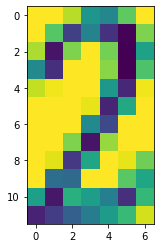

In [18]:
letter_image_file = 'extracted_letter_images/2/000001.png'

image = cv2.imread(letter_image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape) 
(h, w) = image.shape[:2] # note that cv.imread gets an array of h x w, h goes first
# add [:2] so that even if color image will work, not needed here though

plt.imshow(image)
plt.show()

Since `h > w`, we make sure `h` fits in our desired height value, e.g., 20:

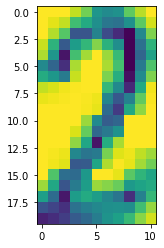

In [19]:
import imutils

image = imutils.resize(image, height=20)
# imutils.resize maintains the aspect ratio

plt.imshow(image)
plt.show()

Now we pad along width to make the image square, i.e., 20 x 20:

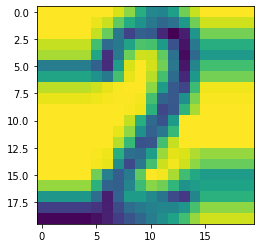

In [20]:
# determine the padding values for the width (= 20)
# to obtain the target dimensions
padW = int((20 - image.shape[1]) / 2.0) # may have rounding

# pad the image
image = cv2.copyMakeBorder(image, 0, 0, padW, padW,
        cv2.BORDER_REPLICATE)

# apply one more resizing to handle any rounding issues
image = cv2.resize(image, (20, 20))

plt.imshow(image)
plt.show()

Using what you learned, now write a function to resize images. Note that you also need to handle the possible case `h < w`:

In [21]:
def resize_to_fit(image, width, height):
    """
    A helper function to resize an image to fit within a given size
    - param image: image to resize
    - param width: desired width in pixels
    - param height: desired height in pixels
    - return: the resized image
    """

    #############################################################################
    # TODO: your code here ...                                                  #
    #############################################################################
    image = imutils.resize(image, height=20)
    padW = int((width - image.shape[1]) / 2.0) # may have rounding

    # pad the image
    # image = cv2.copyMakeBorder(image, 0, 0, padW, padW,
    #         cv2.BORDER_REPLICATE)

    # apply one more resizing to handle any rounding issues
    image = cv2.resize(image, (height, width))
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    # return the pre-processed image
    return image

Prepare the training and validating datasets:

In [22]:
from imutils import paths

# initialize the data and labels
data_labels = []

progress_folder = ''

# loop over the input images
# imutils.paths.list_images will list all images in the 32 subfolders
for image_file in paths.list_images(LETTER_IMAGES_FOLDER):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the letter so it fits in a 20x20 pixel box
    image = resize_to_fit(image, 20, 20)

    # Add a third channel dimension to the image to make Keras happy
    image = np.expand_dims(image, axis=2)

    # Grab the name of the letter based on the folder it was in
    label = image_file.split(os.path.sep)[-2]
    # extracted_letter_images/2/000001.png, after split
    # extracted_letter_images, 2, 000001.png
    # so 2 is the 2nd last, accessed using index -2
    
    if label != progress_folder:
        print('Processing Folder', label)
        progress_folder = label
    
    # Add the letter image and it's label to our training data
    data_labels.append((image,label))

Processing Folder 3
Processing Folder A
Processing Folder 6
Processing Folder F
Processing Folder Q
Processing Folder B
Processing Folder 5
Processing Folder V
Processing Folder M
Processing Folder L
Processing Folder J
Processing Folder D
Processing Folder 9
Processing Folder 7
Processing Folder Z
Processing Folder P
Processing Folder R
Processing Folder 8
Processing Folder G
Processing Folder X
Processing Folder W
Processing Folder Y
Processing Folder U
Processing Folder K
Processing Folder S
Processing Folder 4
Processing Folder E
Processing Folder C
Processing Folder 2
Processing Folder H
Processing Folder T
Processing Folder N


In [23]:
# shuffling training data, as we will use part of it for validation and we need labels to be balanced

import random

random.shuffle(data_labels)
data = [x[0] for x in data_labels]
labels = [x[1] for x in data_labels]

Convert lists into NumPy arrays as required by Keras for input + data normalization:

In [24]:
# scale the raw pixel intensities to the range [0, 1] (this is important!!!)
data = np.array(data, dtype="float") / 255.0

# you may also use std rather than 255, and center the data by mean as follows:
#data = (np.array(data, dtype="float") - data.mean()) / data.std()
# in this case you need to remember the mean and std for use during testing later

# scaling is not needed if you use BatchNormalization after Conv2D and before Activation

labels = np.array(labels)

Split into training and validation datasets:

In [25]:
from sklearn.preprocessing import LabelBinarizer

# Convert the labels (letters) into one-hot encodings that Keras can work with
lb = LabelBinarizer().fit(labels)
print(lb.classes_)
labels = lb.transform(labels)
print()
print(labels)

['2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'J' 'K'
 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [26]:
import pickle

MODEL_LABELS_FILENAME = "model_labels.dat"

# Save the mapping from labels to one-hot encodings.
# We'll need this later when we use the model to decode what it's predictions mean
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lb, f)

Now we are ready to train it using Keras. We’ll use a simple convolutional neural network architecture with two convolutional layers and two fully-connected layers:

In [144]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

clear_session() # free existing Keras models

# Build the neural network!
model = Sequential()

# First convolutional layer with max pooling
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer with max pooling
model.add(Conv2D(50, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Hidden layer with 500 nodes
model.add(Flatten())
model.add(Dense(500, activation="relu"))

# Output layer with 32 nodes (one for each possible letter/number we predict)
model.add(Dense(32, activation="softmax"))

In [145]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 50)        9050      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 50)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1250)              0         
                                                                 
 dense (Dense)               (None, 500)               6

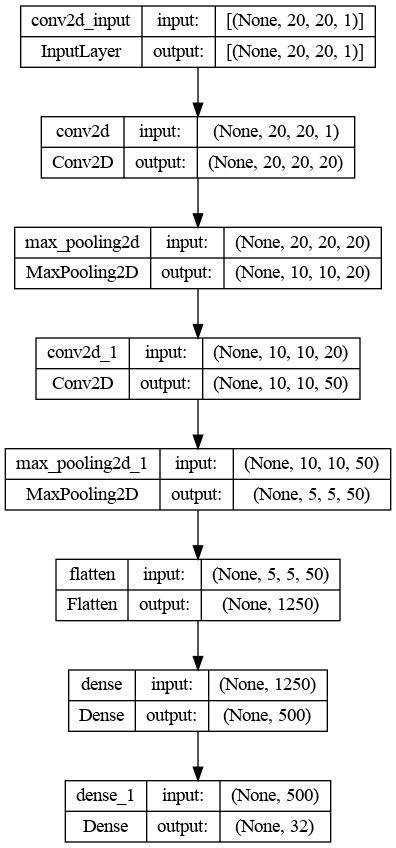

In [146]:
# from tensorflow.keras.utils import plot_model
from keras.utils import plot_model # if does not work properly, try the previous line instead

MODEL_PLOT_FILE = 'model_plot.png'
plot_model(model, to_file=MODEL_PLOT_FILE, show_shapes=True, show_layer_names=True)
display(Image(filename=MODEL_PLOT_FILE))

Questions: (1) Why `conv2d_1` has 9050 parameters? (2) Why `dense` has 625500 parameters?

Hint: self-study http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf
    
**Type Your Answer Here:**

#### Question 1: Why `conv2d_1` has 9050 parameters? 
---

The formula for computation of number of parameters within conv2d layer is given by 

```
param_number = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)
```

```
Output Dimension from the Conv2d =  dimension + 2*padding - kernel/(stride) + 1
```


1st Layer --> Input 20 * 20 * 1 , kernel = 5, Filters =20

So output = 20 +2(0)- 5/(1) + 1 ==> 16 , So output **(16 * 16 * 20)**

2nd Maxpool Layer --> Input 16 * 16 * 1 , kernel = 2, Stride=2, Filters =20

So output = 20 +2(0) -2 /(2) + 1 ==> 10 , So output **(10 * 10 * 20)**

Parameters in conv2d based on formula 

((3*3*20) + 1) * 50 ==> 9050




#### Question - 2 , dense layer parameters
---

```
Num param in dense layer = num Neuron in pre layer * num neuron in current layer  (weights) + num_neuron in current layer(bias)
```

Params = 1250*500 + 500 ==> 625500


Now, let us do the actual training:

In [147]:
# Ask Keras to build the TensorFlow model behind the scenes
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [148]:
# Train the neural network, 20% of the data is used for validation
history = model.fit(data, labels, validation_split=0.20, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
910/910 [==============================] - 16s 18ms/step - loss: 0.1519 - accuracy: 0.9615 - val_loss: 0.0069 - val_accuracy: 0.9993
Epoch 2/10
910/910 [==============================] - 16s 17ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0064 - val_accuracy: 0.9995
Epoch 3/10
910/910 [==============================] - 16s 18ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0098 - val_accuracy: 0.9989
Epoch 4/10
910/910 [==============================] - 16s 17ms/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.0058 - val_accuracy: 0.9995
Epoch 5/10
910/910 [==============================] - 14s 16ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.0059 - val_accuracy: 0.9995
Epoch 6/10
910/910 [==============================] - 15s 16ms/step - loss: 0.0016 - accuracy: 0.9999 - val_loss: 0.0116 - val_accuracy: 0.9979
Epoch 7/10
910/910 [==============================] - 17s 19ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0063 - val_accuracy:

Save the model for later use:

In [90]:
MODEL_FILENAME = "captcha_model.hdf5"

# Save the trained model to disk
model.save(MODEL_FILENAME)

In [149]:
#See what will happen if you do not scale your data by 255.0?
#HINT: simply train again with data/255.0 instead of 255, and see how the loss and acc look like;
#      you need to recreate your model by running the cell containing clear_session() before

#[YOUR CODE HERE]

## NEW MODEL CREATED TO NOT TO CIONTINUE TRAINING


data = [x[0] for x in data_labels]
data = np.array(data, dtype="float") 
# Build the neural network! (
model = Sequential()

# First convolutional layer with max pooling
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer with max pooling
model.add(Conv2D(50, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Hidden layer with 500 nodes
model.add(Flatten())
model.add(Dense(500, activation="relu"))

# Output layer with 32 nodes (one for each possible letter/number we predict)
model.add(Dense(32, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history2 = model.fit(data, labels, validation_split=0.20, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
910/910 [==============================] - 16s 17ms/step - loss: 0.4134 - accuracy: 0.9714 - val_loss: 0.0064 - val_accuracy: 0.9993
Epoch 2/10
910/910 [==============================] - 15s 16ms/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0083 - val_accuracy: 0.9995
Epoch 3/10
910/910 [==============================] - 15s 16ms/step - loss: 0.0336 - accuracy: 0.9930 - val_loss: 0.0260 - val_accuracy: 0.9959
Epoch 4/10
910/910 [==============================] - 13s 14ms/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.0110 - val_accuracy: 0.9993
Epoch 5/10
910/910 [==============================] - 15s 17ms/step - loss: 0.0401 - accuracy: 0.9955 - val_loss: 0.0381 - val_accuracy: 0.9957
Epoch 6/10
910/910 [==============================] - 13s 15ms/step - loss: 0.0183 - accuracy: 0.9975 - val_loss: 0.0496 - val_accuracy: 0.9956
Epoch 7/10
910/910 [==============================] - 15s 17ms/step - loss: 0.0389 - accuracy: 0.9965 - val_loss: 0.0184 - val_accuracy:

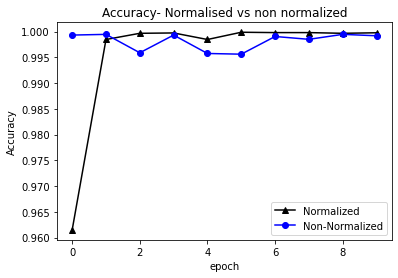

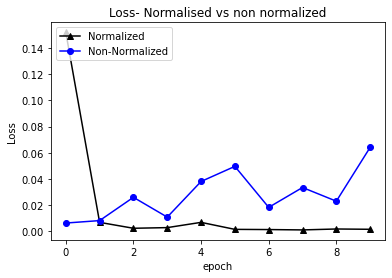

In [157]:
## plotting Normalised vs non Normalised data

plt.plot(history.history['accuracy'],"k^-",label="Normalized")
plt.plot(history2.history['val_accuracy'],'bo-',label="Non-Normalized")
plt.title('Accuracy- Normalised vs non normalized')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend( loc='lower right')
plt.show()

plt.plot(history.history['loss'],"k^-",label="Normalized")
plt.plot(history2.history['val_loss'],'bo-',label="Non-Normalized")
plt.title('Loss- Normalised vs non normalized')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

#### Normalised vs non normalised

Non normalised seems to converge erratically where as normalised convereges smoothly towards end

## Step 3: Use the model to solve CAPTCHAs!

The rest part can be run independently once models are saved.

Get an image from the online demo: https://contactform7.com/captcha/ and try our model on it:

In [159]:
# replace the url with the link of the image you see
# [Using the same image will cause points deducted !!!]
# !wget https://contactform7.com/wp-content/uploads/wpcf7_captcha/2662863423.png
# !wget https://contactform7.com/wp-content/uploads/wpcf7_captcha/283727832.png
# !wget https://contactform7.com/wp-content/uploads/wpcf7_captcha/216215013.png
!wget https://contactform7.com/wp-content/uploads/wpcf7_captcha/1676845467.png
# use the name of the file you downloaded

# TEST_FILE_NAME = '2662863423.png'
# TEST_FILE_NAME = '283727832.png'
# TEST_FILE_NAME = '216215013.png'
TEST_FILE_NAME = '1676845467.png'





# show the image
from IPython.display import Image

display(Image(filename=TEST_FILE_NAME))

--2023-02-16 02:44:38--  https://contactform7.com/wp-content/uploads/wpcf7_captcha/1676845467.png
Resolving contactform7.com (contactform7.com)... 104.21.93.109, 172.67.209.61, 2606:4700:3034::ac43:d13d, ...
Connecting to contactform7.com (contactform7.com)|104.21.93.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1145 (1.1K) [image/png]
Saving to: ‘1676845467.png.1’

1676845467.png.1    100%[===================>]   1.12K  --.-KB/s    in 0s      

2023-02-16 02:44:38 (10.0 MB/s) - ‘1676845467.png.1’ saved [1145/1145]



Load saved model data:

In [160]:
from tensorflow.keras.models import load_model
import pickle

MODEL_FILENAME = "captcha_model.hdf5"
MODEL_LABELS_FILENAME = "model_labels.dat"

# Load up the model labels (so we can translate model predictions to actual letters)
with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

# Load the trained neural network
model = load_model(MODEL_FILENAME)

Load packages and define functions for independent running of Part 3:

In [161]:
import numpy as np
import imutils
import cv2

# [!!! please also run the cell defining function "resize_to_fit" again, if you run Part 3 alone]

Get the letters from the downloaded images:

In [162]:
# Load the image and convert it to grayscale
image = cv2.imread(TEST_FILE_NAME)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 20, 20, 20, 20, cv2.BORDER_REPLICATE)

# threshold the image (convert it to pure black and white)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# find the contours (continuous blobs of pixels) the image
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
# !!! if the cell reports error, replace [0] above with [1]

letter_image_regions = []

# Now we can loop through each of the four contours and extract the letter
# inside of each one
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image_regions.append((x, y, w, h))

# If we found more or less than 4 letters in the captcha, our letter extraction
# didn't work correcly. Skip the image instead of saving bad training data!
if len(letter_image_regions) != 4:
    print('[WARNING]', TEST_FILE_NAME, 'has', len(letter_image_regions), 'contours, unable to process')
else:
    print('[SUCCESS]')

[SUCCESS]


If you see a warning, use another image instead and repeat the previous steps.

Otherwise, continue to create an output image:

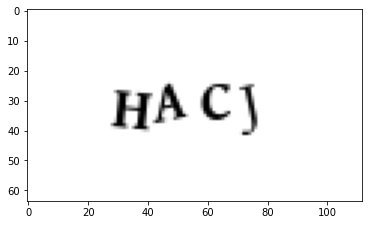

In [163]:
# Sort the detected letter images based on the x coordinate to make sure
# we are processing them from left-to-right so we match the right image
# with the right letter
letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

# Create an output image and a list to hold our predicted letters
output = cv2.merge([gray] * 3) # 2D gray image -> 3D color image

# show the 3D image
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(output)
plt.show()

1/1 [==============================] - 0s 128ms/step
H
1/1 [==============================] - 0s 37ms/step
A
1/1 [==============================] - 0s 48ms/step
4
1/1 [==============================] - 0s 30ms/step
J
CAPTCHA text is: HA4J


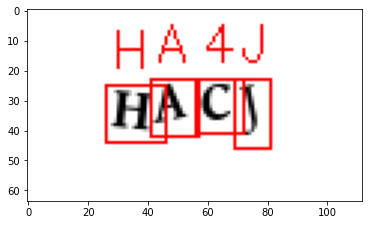

In [164]:
predictions = []

# Save out each letter as a single image
for letter_bounding_box in letter_image_regions:
    # Grab the coordinates of the letter in the image
    x, y, w, h = letter_bounding_box

    # Extract the letter from the original image with a 2-pixel margin around the edge
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]
    # plt.imshow(letter_image)
    # plt.show()
    # Re-size the letter image to 20x20 pixels to match training data
    letter_image = resize_to_fit(letter_image, 20, 20)
    # plt.imshow(letter_image)
    # plt.show()
    # Turn the single image into a 4D list of images to make Keras happy
    # 4D: image_number (=1) x height x width x channel (=1)
    letter_image = np.expand_dims(letter_image, axis=2)
    letter_image = np.expand_dims(letter_image, axis=0)
    
    letter_image = letter_image/255.0
    # Ask the neural network to make a prediction
    prediction = model.predict(letter_image) # output is one-hot encoded
        
    letter = lb.inverse_transform(prediction)[0]
    print(letter)
    # use [0] since there is only one test data's label item in the list
    predictions.append(letter)
    
    # draw the prediction on the output image
    # (255, 0, 0) = red
    cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (255, 0, 0), 1)
    cv2.putText(output, letter, (x, y - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255, 0, 0), 1)

# see prediction result:

# Print the captcha's text
captcha_text = "".join(predictions)
print("CAPTCHA text is: {}".format(captcha_text))

# Show the annotated image
plt.imshow(output)
plt.show()

Questions: Is the prediction correct? How many letters are correctly predicted?



**Type Your Answer Here:**

Three out of 4 charecters in the images are captured by our model